# DATASET 1

In [2]:
# Importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [3]:
# Import the First dataset
df = pd.read_csv('Council_property_ownership.csv')
df.head(5)

,OBJECTID,PROPERTY_ID,ADDRESS,HECTARES,DEEDREF,LANDREG,PROPERTY_TYPE,ASSET_CAT,USER_,DEPT_UNIT,RECORD_TYPE,DEPARTMENT,WARD_NAME,WARD_CODE,SHAPESTArea,SHAPESTLength
0,1,126840,Montpelier Park - Part Of Playground\rSt Andre...,0.001012,NaN,NO PAPER TITLE,Land-Public Park,Community,GR - Parks Landscape Heritage Estates,GR - Parks Landscape Heritage Estates,In Occupation,GR - Growth and Regeneration,Ashley,E05010885,10.117895,23.293426
1,2,4018,Brookland Hall\rConduit Place\rAshley Vale\rBr...,0.036293,NaN,NOT APPLICABLE,Offices,Land and Buildings,ADC - Adult Social Care-General,ADC - Adult Social Care-General,In Occupation,ADC - Adults and Communities,Ashley,E05010885,362.925000,87.147109
2,3,116054,Bristol Royal Infirmary\rUpper Maudlin Street\...,0.000313,NaN,NOT APPLICABLE,Offices,Land and Buildings,ADC - Adult Social Care-General,ADC - Adult Social Care-General,In Occupation,ADC - Adults and Communities,Central,E05010892,3.125507,6.275065
3,4,127033,Buckley Court\r33 Machin Road\rBrentry\rBristo...,0.000313,NaN,NOT APPLICABLE,Offices,Land and Buildings,ADC - Adult Social Care-General,ADC - Adult Social Care-General,In Occupation,ADC - Adults and Communities,Henbury & Brentry,E05010901,3.125567,6.275125
4,5,127034,New Friends Hall\rBarkleys Hill\rStapleton\rBr...,0.069412,NaN,NOT APPLICABLE,Offices,Land and Buildings,ADC - ASC-Learning Difficulties,ADC - ASC-Learning Difficulties,In Occupation,ADC - Adults and Communities,Eastville,E05010897,694.118450,126.989787


### Data Exploration

In [4]:
df.shape

(35180, 16)

The dataset contains 35180 rows and 16 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35180 entries, 0 to 35179
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       35180 non-null  int64  
 1   PROPERTY_ID    35180 non-null  int64  
 2   ADDRESS        35180 non-null  object 
 3   HECTARES       34917 non-null  float64
 4   DEEDREF        8048 non-null   object 
 5   LANDREG        34897 non-null  object 
 6   PROPERTY_TYPE  35180 non-null  object 
 7   ASSET_CAT      35180 non-null  object 
 8   USER_          35180 non-null  object 
 9   DEPT_UNIT      35180 non-null  object 
 10  RECORD_TYPE    35180 non-null  object 
 11  DEPARTMENT     35180 non-null  object 
 12  WARD_NAME      35103 non-null  object 
 13  WARD_CODE      35103 non-null  object 
 14  SHAPESTArea    35180 non-null  float64
 15  SHAPESTLength  35180 non-null  float64
dtypes: float64(3), int64(2), object(11)
memory usage: 4.3+ MB


From the query above, we can see that there are missing values in the dataset

In [6]:
df.describe(include='all')

,OBJECTID,PROPERTY_ID,ADDRESS,HECTARES,DEEDREF,LANDREG,PROPERTY_TYPE,ASSET_CAT,USER_,DEPT_UNIT,RECORD_TYPE,DEPARTMENT,WARD_NAME,WARD_CODE,SHAPESTArea,SHAPESTLength
count,35180.000000,35180.000000,35180,34917.000000,8048,34897,35180,35180,35180,35180,35180,35180,35103,35103,3.518000e+04,35180.000000
unique,NaN,NaN,35039,NaN,3037,13122,109,10,57,58,4,6,34,34,NaN,NaN
top,NaN,NaN,Mile Walk - POS Land At\rMile Walk\rHengrove\r...,NaN,14875,ADOPTED HIGHWAY,HRA Housing Flat/Flats,Council Dwellings,GR - Housing HRA Residential,GR - Housing HRA Residential,Ownership Record,GR - Growth and Regeneration,Hartcliffe & Withywood,E05010900,NaN,NaN
freq,NaN,NaN,7,NaN,189,652,14447,28807,27306,27309,34777,34696,3909,3909,NaN,NaN
mean,17590.500000,41758.597499,NaN,0.144555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.445749e+03,140.121269
std,10155.735572,29596.925744,NaN,2.150299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142274e+04,477.406274
min,1.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.323555e-01,3.993519
25%,8795.750000,27452.750000,NaN,0.016200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.657967e+02,62.629974
50%,17590.500000,38314.500000,NaN,0.027800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.811581e+02,80.434885
75%,26385.250000,49230.250000,NaN,0.044948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.513888e+02,106.212846


array([[<Axes: title={'center': 'OBJECTID'}>,
        <Axes: title={'center': 'PROPERTY_ID'}>],
       [<Axes: title={'center': 'HECTARES'}>,
        <Axes: title={'center': 'SHAPESTArea'}>],
       [<Axes: title={'center': 'SHAPESTLength'}>, <Axes: >]],
      dtype=object)

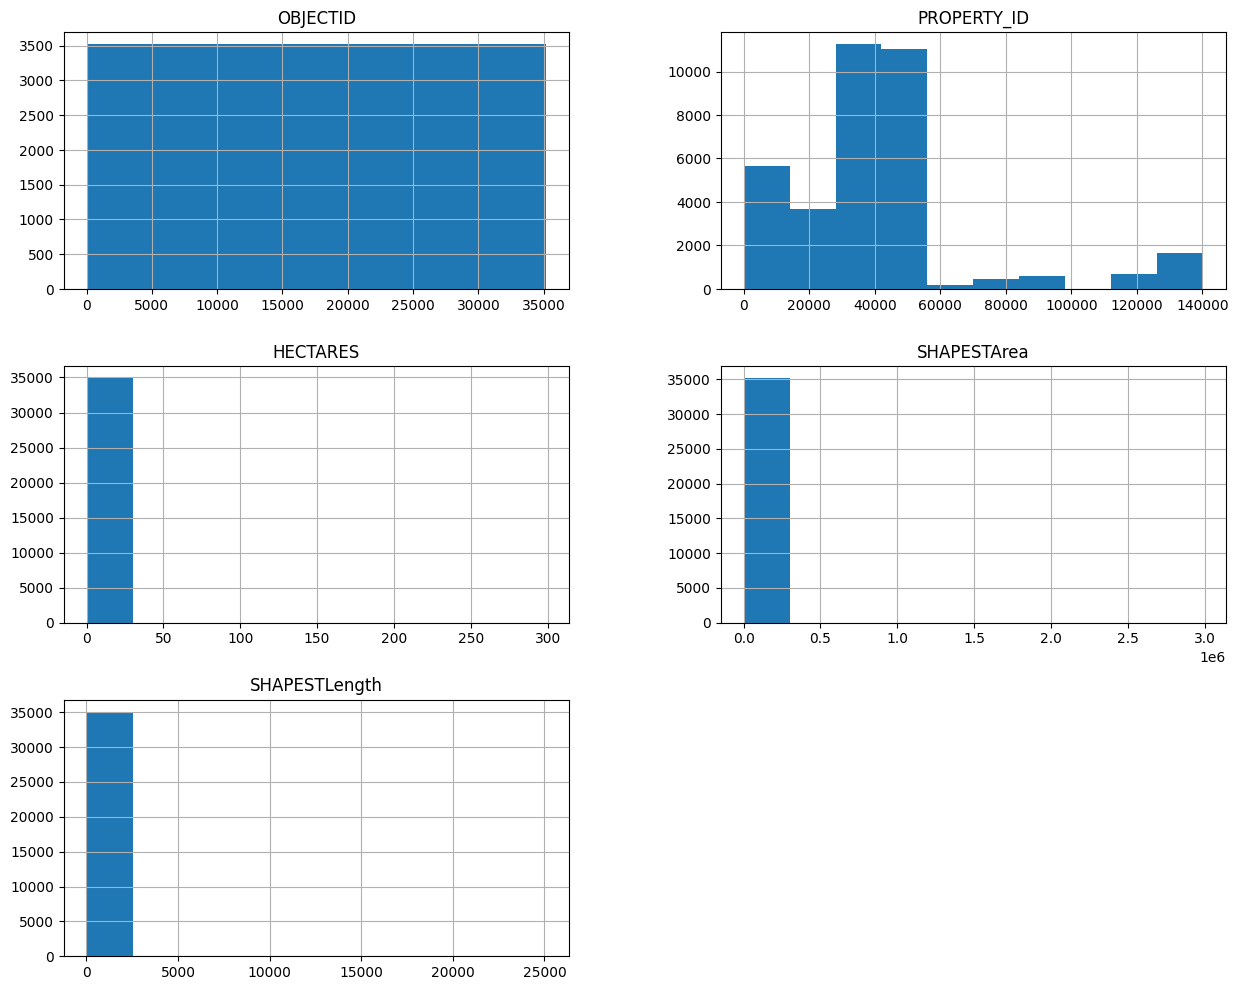

In [7]:
df.hist(figsize=(15,12))

In [8]:
df.ASSET_CAT.value_counts()

,count
ASSET_CAT,
Council Dwellings,28807
Land and Buildings,2899
Infrastructure,1918
Community,733
Investment Properties,697
Surplus,38
Non Asset / Interest only,33
Heritage Assets,33
Assets Under Construction,17


In [9]:
df.WARD_NAME.value_counts()

,count
WARD_NAME,
Hartcliffe & Withywood,3909
Avonmouth & Lawrence Weston,3367
Lawrence Hill,3199
Filwood,2241
Henbury & Brentry,1986
Southmead,1830
Central,1682
Lockleaze,1357
Frome Vale,1098


### Data Preprocessing

Getting the number of council properties per ward and storing it in a new dataframe.

In [10]:
df_prop = df.groupby(['WARD_NAME', 'WARD_CODE']).size().reset_index(name='NO_of_Council_Dwelling')

In [11]:
df_prop.head(5)

,WARD_NAME,WARD_CODE,NO_of_Council_Dwelling
0,Ashley,E05010885,1050
1,Avonmouth & Lawrence Weston,E05010886,3367
2,Bedminster,E05010887,834
3,Bishopston & Ashley Down,E05010888,81
4,Bishopsworth,E05010889,742


In [12]:
df_prop.shape

(34, 3)

After cleaning the dataset and extracting the needed information from it, it has been reduced to 34 rows and 3 columns.

In [13]:
# Checking for duplicates
df_prop.duplicated().sum()

np.int64(0)

In [14]:
# Checking for missing values
df_prop.isnull().sum()

,0
WARD_NAME,0
WARD_CODE,0
NO_of_Council_Dwelling,0


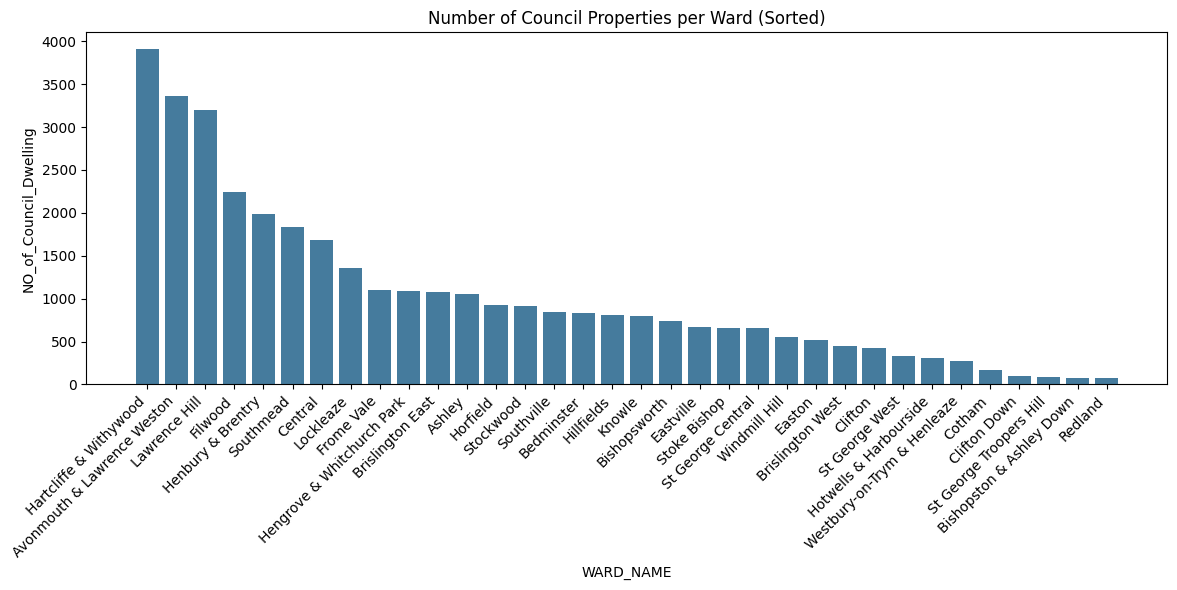

In [36]:
df_sorted = df_prop.sort_values(by='NO_of_Council_Dwelling', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['WARD_NAME'], df_sorted['NO_of_Council_Dwelling'], color='#457b9d')
plt.xlabel('WARD_NAME')
plt.ylabel('NO_of_Council_Dwelling')
plt.title('Number of Council Properties per Ward (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# DATASET 2

In [16]:
# Importing the supplementing dataset
df2 = pd.read_csv('Child_Poverty_in_Bristol_by_Ward.csv')
df2.head(5)

,OBJECTID,WARD_CODE,WARD_NAME,PERIOD,MEASURE_TYPE,WARD_NUMBER,WARD_STATISTIC
0,1,E05010885,Ashley,2015,Absolute low income (compared to 2011),710,21.5
1,2,E05010886,Avonmouth and Lawrence Weston,2015,Absolute low income (compared to 2011),948,20.7
2,3,E05010887,Bedminster,2015,Absolute low income (compared to 2011),219,11.9
3,4,E05010888,Bishopston and Ashley Down,2015,Absolute low income (compared to 2011),143,6.3
4,5,E05010889,Bishopsworth,2015,Absolute low income (compared to 2011),332,15.7


### Data exploration

In [17]:
df2.shape

(630, 7)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        630 non-null    int64  
 1   WARD_CODE       630 non-null    object 
 2   WARD_NAME       630 non-null    object 
 3   PERIOD          630 non-null    int64  
 4   MEASURE_TYPE    630 non-null    object 
 5   WARD_NUMBER     630 non-null    int64  
 6   WARD_STATISTIC  630 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 34.6+ KB


In [19]:
df2.describe(include='all')

,OBJECTID,WARD_CODE,WARD_NAME,PERIOD,MEASURE_TYPE,WARD_NUMBER,WARD_STATISTIC
count,630.000000,630,630,630.000000,630,630.000000,630.000000
unique,NaN,35,35,NaN,2,NaN,NaN
top,NaN,E05010885,Ashley,NaN,Absolute low income (compared to 2011),NaN,NaN
freq,NaN,18,18,NaN,315,NaN,NaN
mean,315.500000,NaN,NaN,2019.000000,NaN,817.690476,15.423333
std,182.009615,NaN,NaN,2.584041,NaN,2367.333797,8.524284
min,1.000000,NaN,NaN,2015.000000,NaN,27.000000,2.200000
25%,158.250000,NaN,NaN,2017.000000,NaN,144.500000,9.525000
50%,315.500000,NaN,NaN,2019.000000,NaN,339.500000,14.500000
75%,472.750000,NaN,NaN,2021.000000,NaN,584.750000,20.100000


array([[<Axes: title={'center': 'OBJECTID'}>,
        <Axes: title={'center': 'PERIOD'}>],
       [<Axes: title={'center': 'WARD_NUMBER'}>,
        <Axes: title={'center': 'WARD_STATISTIC'}>]], dtype=object)

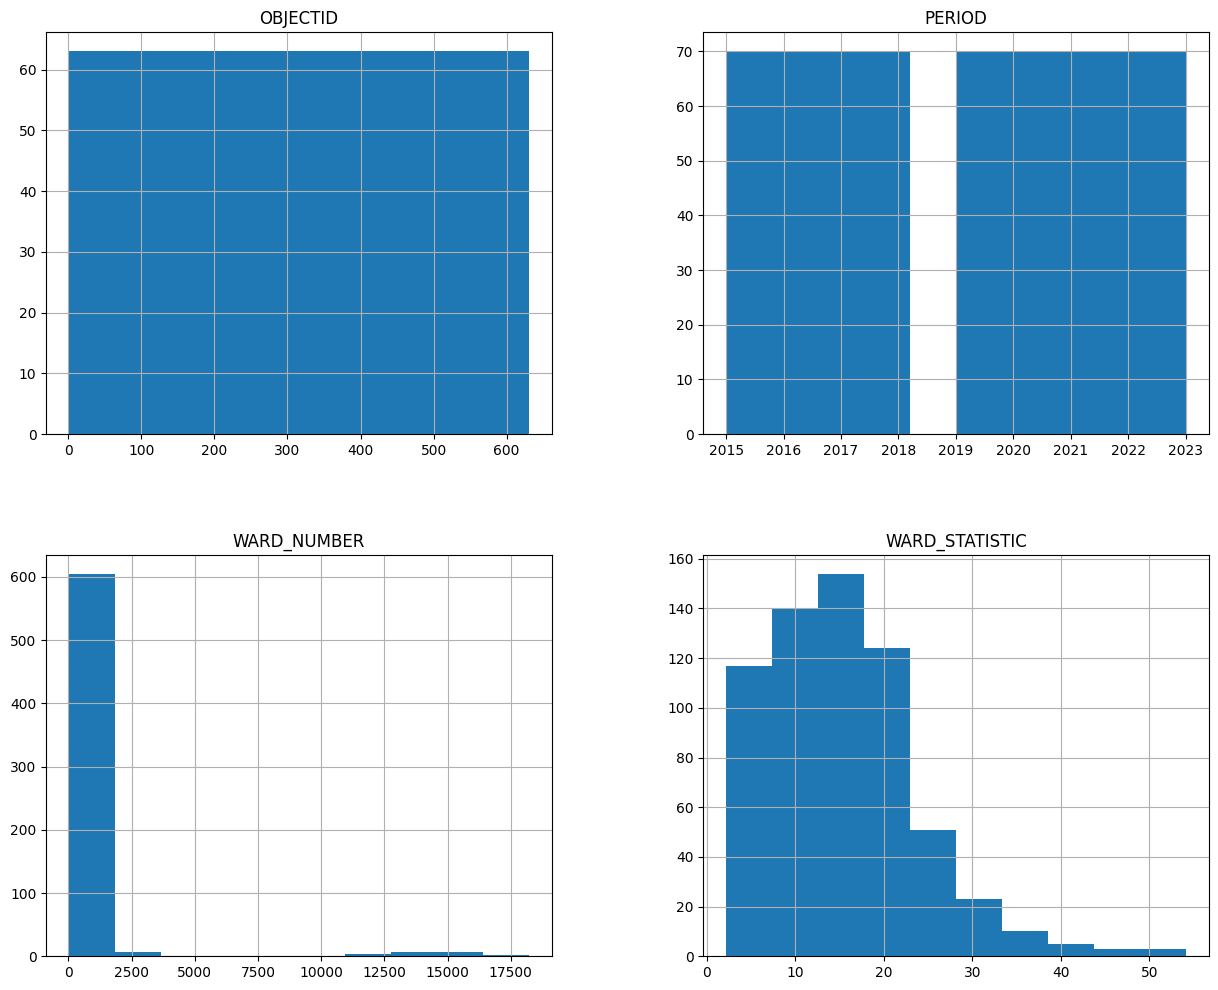

In [20]:
df2.hist(figsize=(15,12))

### Dataset Preprocessing

I am going to be looking at the poverty statistics in each ward in the Year 2023

In [21]:
# Filter poverty data for 'Relative low income' in 2023
df2_filt = df2[
    (df2['MEASURE_TYPE'] == 'Relative low income') &
    (df2['PERIOD'] == 2023)
]
df2_filt.head(5)

,OBJECTID,WARD_CODE,WARD_NAME,PERIOD,MEASURE_TYPE,WARD_NUMBER,WARD_STATISTIC
595,596,E05010885,Ashley,2023,Relative low income,766,25.1
596,597,E05010886,Avonmouth and Lawrence Weston,2023,Relative low income,1148,23.7
597,598,E05010887,Bedminster,2023,Relative low income,231,11.8
598,599,E05010888,Bishopston and Ashley Down,2023,Relative low income,144,6.4
599,600,E05010889,Bishopsworth,2023,Relative low income,355,15.7


In [22]:
ward_sum = df2_filt[['WARD_NAME', 'WARD_STATISTIC', 'WARD_NUMBER','WARD_CODE']].rename(
    columns={'WARD_STATISTIC': 'Ward Statistic (percentage)'}
)
ward_sum.head(5)

,WARD_NAME,Ward Statistic (percentage),WARD_NUMBER,WARD_CODE
595,Ashley,25.1,766,E05010885
596,Avonmouth and Lawrence Weston,23.7,1148,E05010886
597,Bedminster,11.8,231,E05010887
598,Bishopston and Ashley Down,6.4,144,E05010888
599,Bishopsworth,15.7,355,E05010889


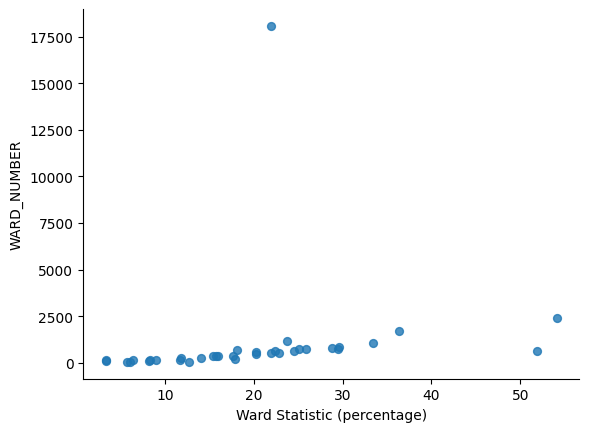

In [23]:
# Plotting the Ward Statistic (percentage) vs WARD_NUMBER
ward_sum.plot(kind='scatter', x='Ward Statistic (percentage)', y='WARD_NUMBER', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

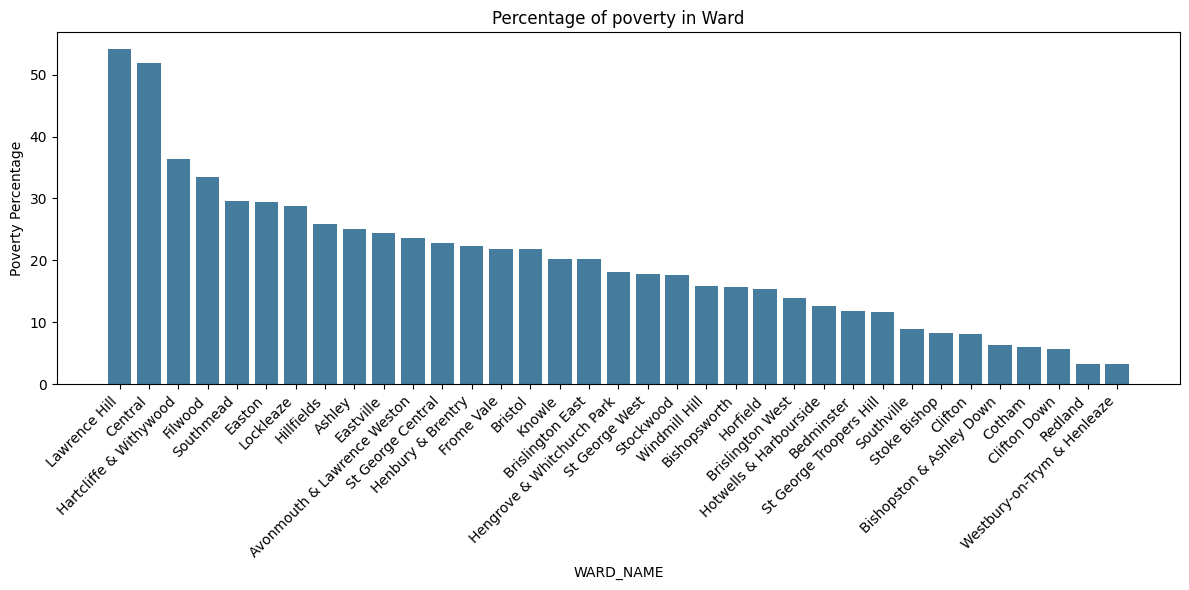

In [47]:
ward_sorted = ward_sum.sort_values(by='Ward Statistic (percentage)', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(ward_sorted['WARD_NAME'], ward_sorted['Ward Statistic (percentage)'], color='#457b9d')
plt.xlabel('WARD_NAME')
plt.ylabel('Poverty Percentage')
plt.title('Percentage of poverty in Ward')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Combining the two cleaned datasets into one

In [25]:
# Checking for differences between the common columns in both datasets
wards_housing = set(df_prop['WARD_NAME'].unique())
wards_poverty = set(ward_sum['WARD_NAME'].unique())
missing = wards_housing.symmetric_difference(wards_poverty)

print(f"Ward names not matching: {missing}")

wards_code = set(df_prop['WARD_CODE'].unique())
wards_pov_code = set(ward_sum['WARD_CODE'].unique())
missing_code = wards_code.symmetric_difference(wards_pov_code)

print(f"Ward codes not matching: {missing_code}")

Ward names not matching: {'Avonmouth and Lawrence Weston', 'Hartcliffe and Withywood', 'Hengrove and Whitchurch Park', 'Bishopston & Ashley Down', 'Hotwells & Harbourside', 'Hengrove & Whitchurch Park', 'Hotwells and Harbourside', 'Avonmouth & Lawrence Weston', 'Henbury and Brentry', 'Henbury & Brentry', 'Bishopston and Ashley Down', 'Westbury-on-Trym & Henleaze', 'Hartcliffe & Withywood', 'Westbury-on-Trym and Henleaze', 'Bristol'}
Ward codes not matching: {'E06000023'}


In [26]:
# Matching the ward names in the two datasets
ward_name_sync = {
    'Avonmouth and Lawrence Weston': 'Avonmouth & Lawrence Weston',
    'Hartcliffe and Withywood': 'Hartcliffe & Withywood',
    'Hotwells and Harbourside': 'Hotwells & Harbourside',
    'Hengrove and Whitchurch Park': 'Hengrove & Whitchurch Park',
    'Bishopston and Ashley Down': 'Bishopston & Ashley Down',
    'Westbury-on-Trym and Henleaze': 'Westbury-on-Trym & Henleaze',
    'Henbury and Brentry': 'Henbury & Brentry'
}

# Replacing the names
ward_sum['WARD_NAME'] = ward_sum['WARD_NAME'].replace(ward_name_sync, regex=False)

In [27]:
# Merging the cheaned dataset
df_merged2 = pd.merge(df_prop, ward_sum, on=['WARD_CODE','WARD_NAME'], how='inner').reset_index(drop=True)

# Check result
print("Merged shape:", df_merged2.shape)
df_merged2.head(5)

Merged shape: (34, 5)


,WARD_NAME,WARD_CODE,NO_of_Council_Dwelling,Ward Statistic (percentage),WARD_NUMBER
0,Ashley,E05010885,1050,25.1,766
1,Avonmouth & Lawrence Weston,E05010886,3367,23.7,1148
2,Bedminster,E05010887,834,11.8,231
3,Bishopston & Ashley Down,E05010888,81,6.4,144
4,Bishopsworth,E05010889,742,15.7,355


The new dataframe, which contains the ward names and poverty statistics in 2013 has 34 rows and 5 columns.

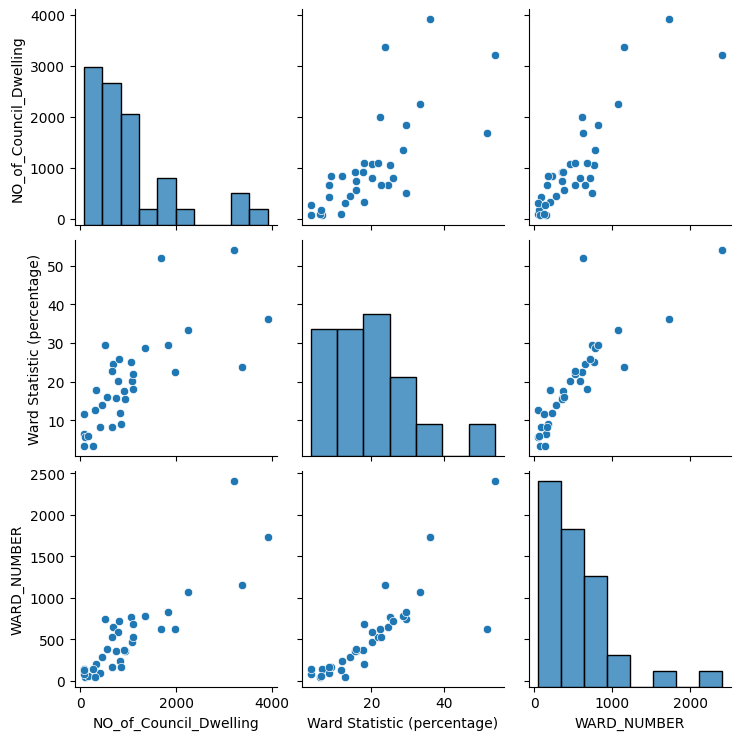

In [48]:
sns.pairplot(df_merged2)

From the plots above, there are several outliers in the dataframe, but since the data is minimal, I will leave them in the data.

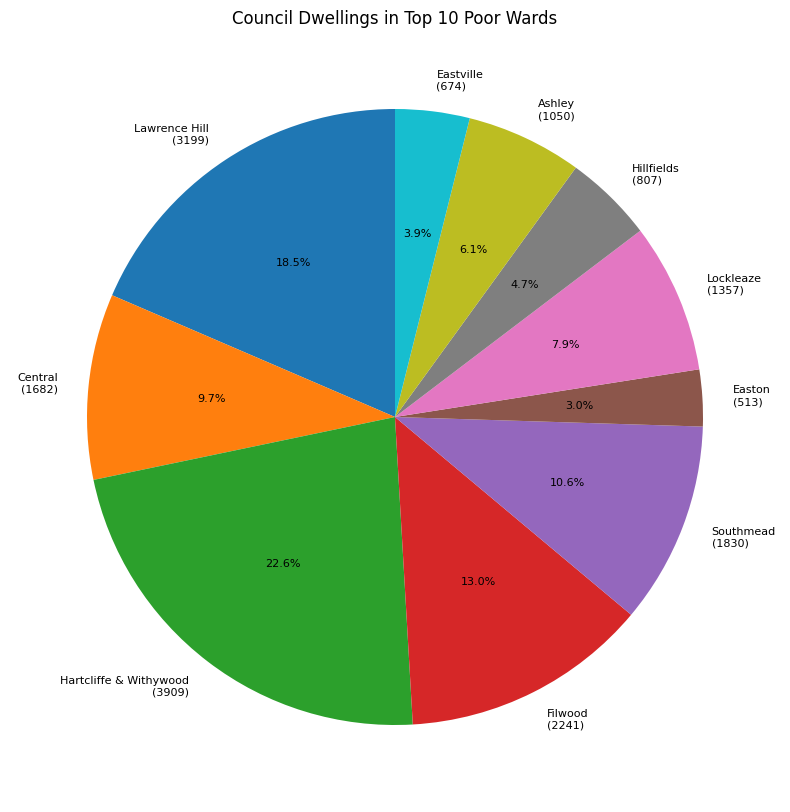

In [49]:
# Getting the top 10 poor wards
top_10s = df_merged2.sort_values(by='Ward Statistic (percentage)', ascending=False).head(10)

labels = [
    f"{ward}\n({count})"
    for ward, count in zip(top_10s['WARD_NAME'], top_10s['NO_of_Council_Dwelling'])
]

# Creating the pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    top_10s['NO_of_Council_Dwelling'],
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 8},
)

plt.title('Council Dwellings in Top 10 Poor Wards')
plt.show()

Correlation plot

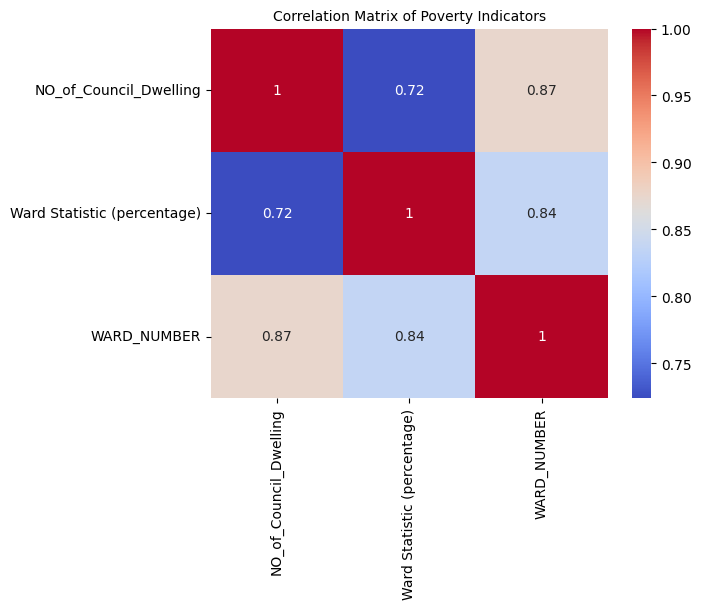

In [50]:
# Numeric columns for correlation calculation
numeric_df = df_merged2.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

# Display the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Poverty Indicators', fontsize=10)

plt.show()

From the correlation plot, there is a strong connection between the Poverty statistics and the number of council dwellings.

#### Building a regression model

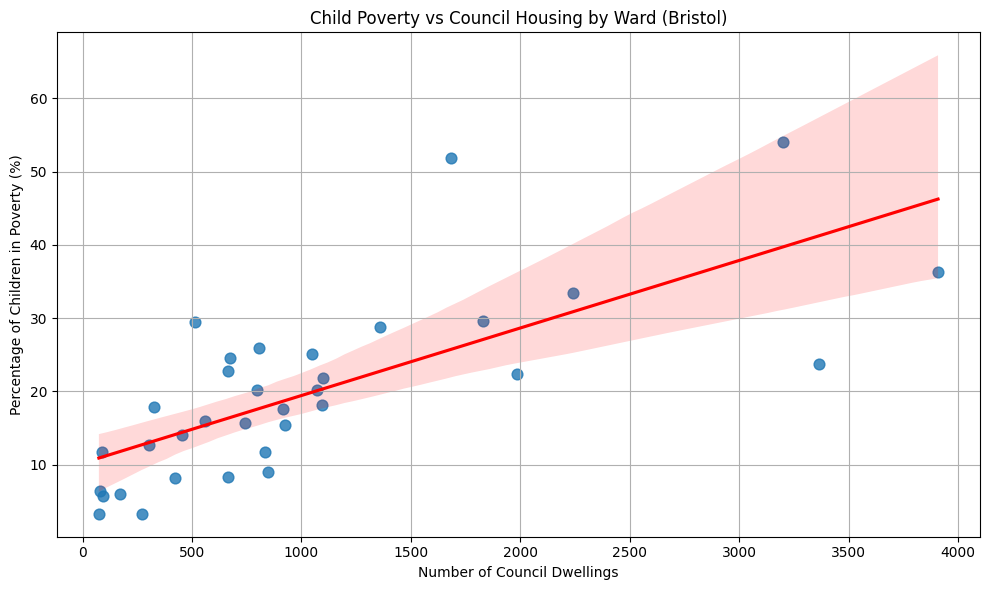

In [51]:
# Fitting regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_merged2,
    x='NO_of_Council_Dwelling',
    y='Ward Statistic (percentage)',
    scatter_kws={'s': 60},
    line_kws={'color': 'red'}
)
plt.title('Child Poverty vs Council Housing by Ward (Bristol)')
plt.xlabel('Number of Council Dwellings')
plt.ylabel('Percentage of Children in Poverty (%)')
plt.savefig('Regression.png', dpi=300)
plt.grid(True)
plt.tight_layout()
plt.show()

##### Simple Linear Regression

In [32]:
X = df_merged2['NO_of_Council_Dwelling']
y = df_merged2['Ward Statistic (percentage)']

# adds intercept term
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:     Ward Statistic (percentage)   R-squared:                       0.524
Model:                                     OLS   Adj. R-squared:                  0.509
Method:                          Least Squares   F-statistic:                     35.24
Date:                         Wed, 07 May 2025   Prob (F-statistic):           1.31e-06
Time:                                 08:52:19   Log-Likelihood:                -119.88
No. Observations:                           34   AIC:                             243.8
Df Residuals:                               32   BIC:                             246.8
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

There is a strong relationship between council dwellings and ward poverty at a significant level of 0.005 and a p-value of 0.000.

##### Multiple Linear Regression

In [34]:
X2 = numeric_df.drop('Ward Statistic (percentage)', axis=1)
y2 = numeric_df['Ward Statistic (percentage)']

# adds intercept term
X2 = sm.add_constant(X2)

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:     Ward Statistic (percentage)   R-squared:                       0.699
Model:                                     OLS   Adj. R-squared:                  0.680
Method:                          Least Squares   F-statistic:                     36.06
Date:                         Wed, 07 May 2025   Prob (F-statistic):           8.11e-09
Time:                                 08:52:51   Log-Likelihood:                -112.07
No. Observations:                           34   AIC:                             230.1
Df Residuals:                               31   BIC:                             234.7
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

##### RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model4 = RandomForestRegressor(n_estimators=100, random_state=42)
model4.fit(X2,y2)
predictions = model4.predict(X2)
mse = mean_squared_error(y2, predictions)
r2 = r2_score(y2, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 8.702898764705864
R-squared: 0.9387546521421276


Using a random forest regressor model on the data shows high accuracy, but this is due to the size of the dataset. Since the data is small, I am not able to split it into training and test sets. Training the model with the whole dataset and predicting with it introduces bias into the model.

In short, wards with more council housing tend to have higher levels of child poverty. This does not prove causation, but the correlation is strong and statistically significant. Council housing appears concentrated in disadvantaged areas.